# Introduction to Zomato

#### Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Pankaj Chaddah and Deepinder Goyal in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities. As of 2019, the service is available in 24 countries and in more than 10,000 cities.



![My Image](OneDrive/Desktop/zomato_0-sixteen_nine.jpg)


## Introduction to the Notebook

###### In this notebook we can explore the activities of the Zomato restaurants in Hyderabad, the capital and largest city of the Indian state of Telangana and the the jure capital of Andhra Pradesh. We are going to work with two dataset:

- **Restaurant names and Metadata** - This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

- **Restaurant reviews** - Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
name_filepath = 'OneDrive/Desktop/Restaurant names and Metadata.csv'
reviews_filepath = 'OneDrive/Desktop/Restaurant reviews.csv'

name_metadata_df = pd.read_csv(name_filepath)
reviews_df = pd.read_csv(reviews_filepath)

In [4]:
restaurants = name_metadata_df.copy()
reviews = reviews_df.copy()


### Restaurants dataset preprocessing

###### *How big is the restaurants dataset?*

In [5]:
restaurants.shape

(105, 6)

###### *Let's have a look on the fisrt 5 rows of the dataset*

In [6]:
restaurants.head()  # By default 5 rows should be output,
                    #Give a specified number to get no of wanted rows

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


##### All collumns in restaurent table

In [7]:
restaurants.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

###### Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'

In [8]:
restaurants['Cost'] = restaurants['Cost'].str.replace(",","").astype('int64')

###### We convert the 'Cost' column data type but, what are the other features data type?

In [9]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


##### *Finally, how much missing values there are in these dataset?*

In [10]:
restaurants.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

### the describe() method provides a summary of the statistics for the numerical columns by default. This method can help you understand the distribution, central tendency, and spread of the data.

- Count: Shows the number of non-null entries in each column.
- Mean: Displays the mean (average) value for each column.
- Standard Deviation (std): Shows the standard deviation, which measures the amount of variation or dispersion from the mean.
- Minimum (min): Displays the minimum value for each column.
- 25% Percentile (25%): The value below which 25% of the data falls.
- 50% Percentile (50%) or Median: The middle value that separates the higher half from the lower half.
- 75% Percentile (75%): The value below which 75% of the data falls.
- Maximum (max): Displays the maximum value for each column.
 

In [11]:
restaurants.describe()

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


### Reviews dataset preprocessing

##### How big is the reviews dataset?

In [12]:
reviews.shape

(10000, 7)

##### Let's have a look on the fisrt 5 rows of the dataset

In [13]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [14]:
reviews.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [15]:
reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

##### As we can see, there are few missing values compared to the shape of the dataset so I decide to drop them all because there isn't a big loss

In [16]:
reviews.dropna(inplace = True)

In [17]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


##### After have had a look on the type of the features, I want to change a few of them. First of all i want to change the 'Rating' column dtype.



In [18]:
reviews['Rating'].value_counts()

Rating
5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

##### As we can see there is that 'like' which is inconvertible to a number so the only way I can convert this functionality to type 'float64' is to omit that data



In [19]:
reviews=reviews[reviews['Rating']!='Like']

##### Now, as said before i change a lot of dtype of the other features. I also add a new feature called 'Year' extrapolating the data from the 'Time' column



##### And finally we can have another look of the dataset with our changes

In [20]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Analysis of various themes of the datasets

#### Cuisines variety analisys

##### First of all we can draw a WordCloud of the most nominated words in the cuisine feature

In [ ]:
cuisine_list = restaurants.Cuisines.str.split(', ') #split the list into names
cuis_list = {} #create an empty list
for names in cuisine_list: # for any names in cuisine_list
    for name in names: # for any name in names
        if (name in cuis_list): #if this name is already present in the cuis_list
            cuis_list[name]+=1 # increase his value
        else:  # else
            cuis_list[name]=1 # Create his index in the list
cuis_df = pd.DataFrame(cuis_list.values(),index = cuis_list.keys(),columns = {'Counts of Restaurants'}) #Create a cuis dataframe
cuis_df.sort_values(by = 'Counts of Restaurants',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_cuis = cuis_df[0:10] #Pick the 10 restaurant most nominated
print('The Top 10 Cuisines are:\n',top_10_cuis)

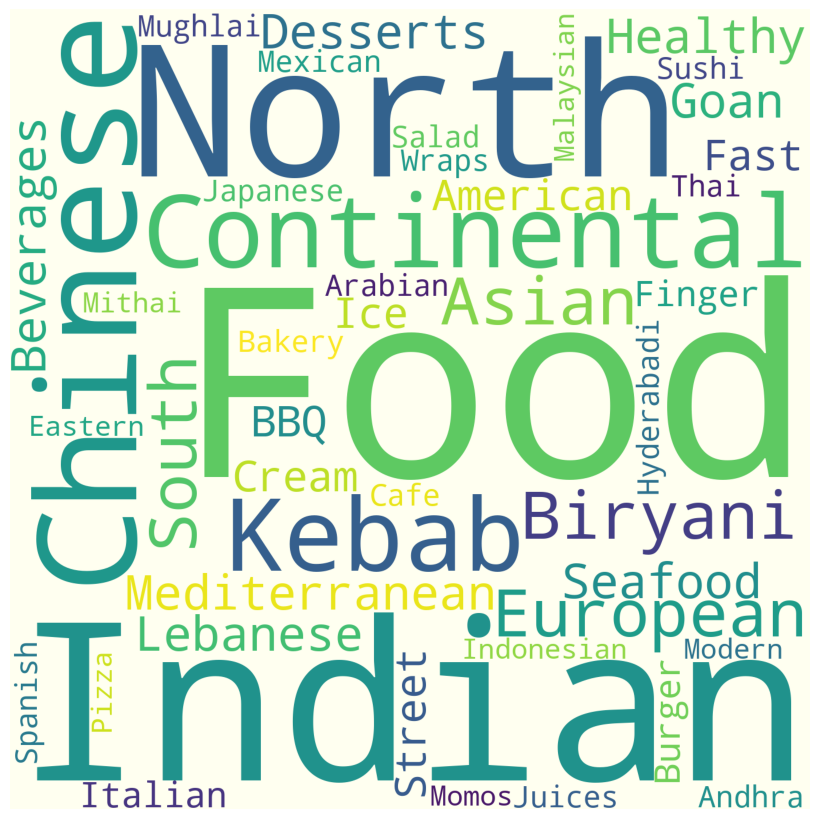

In [33]:
from wordcloud import WordCloud, STOPWORDS
words_list = cuis_list.keys()
strr = ' '
for i in words_list:
    strr=strr+i+' '
    
wordcloud = WordCloud(width = 1400, height = 1400, 
                background_color ='ivory',  
                min_font_size = 12).generate(strr) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Costs of the restaurants

#### *Now we can plot a graph representing the restaurants based on the costs of them*

C:\Users\skmas\AppData\Local\Temp\ipykernel_19420\3465237496.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  restaurants_cost=restaurants.groupby('Name').apply(lambda x:np.average(x['Cost'])).reset_index(name='Cost')


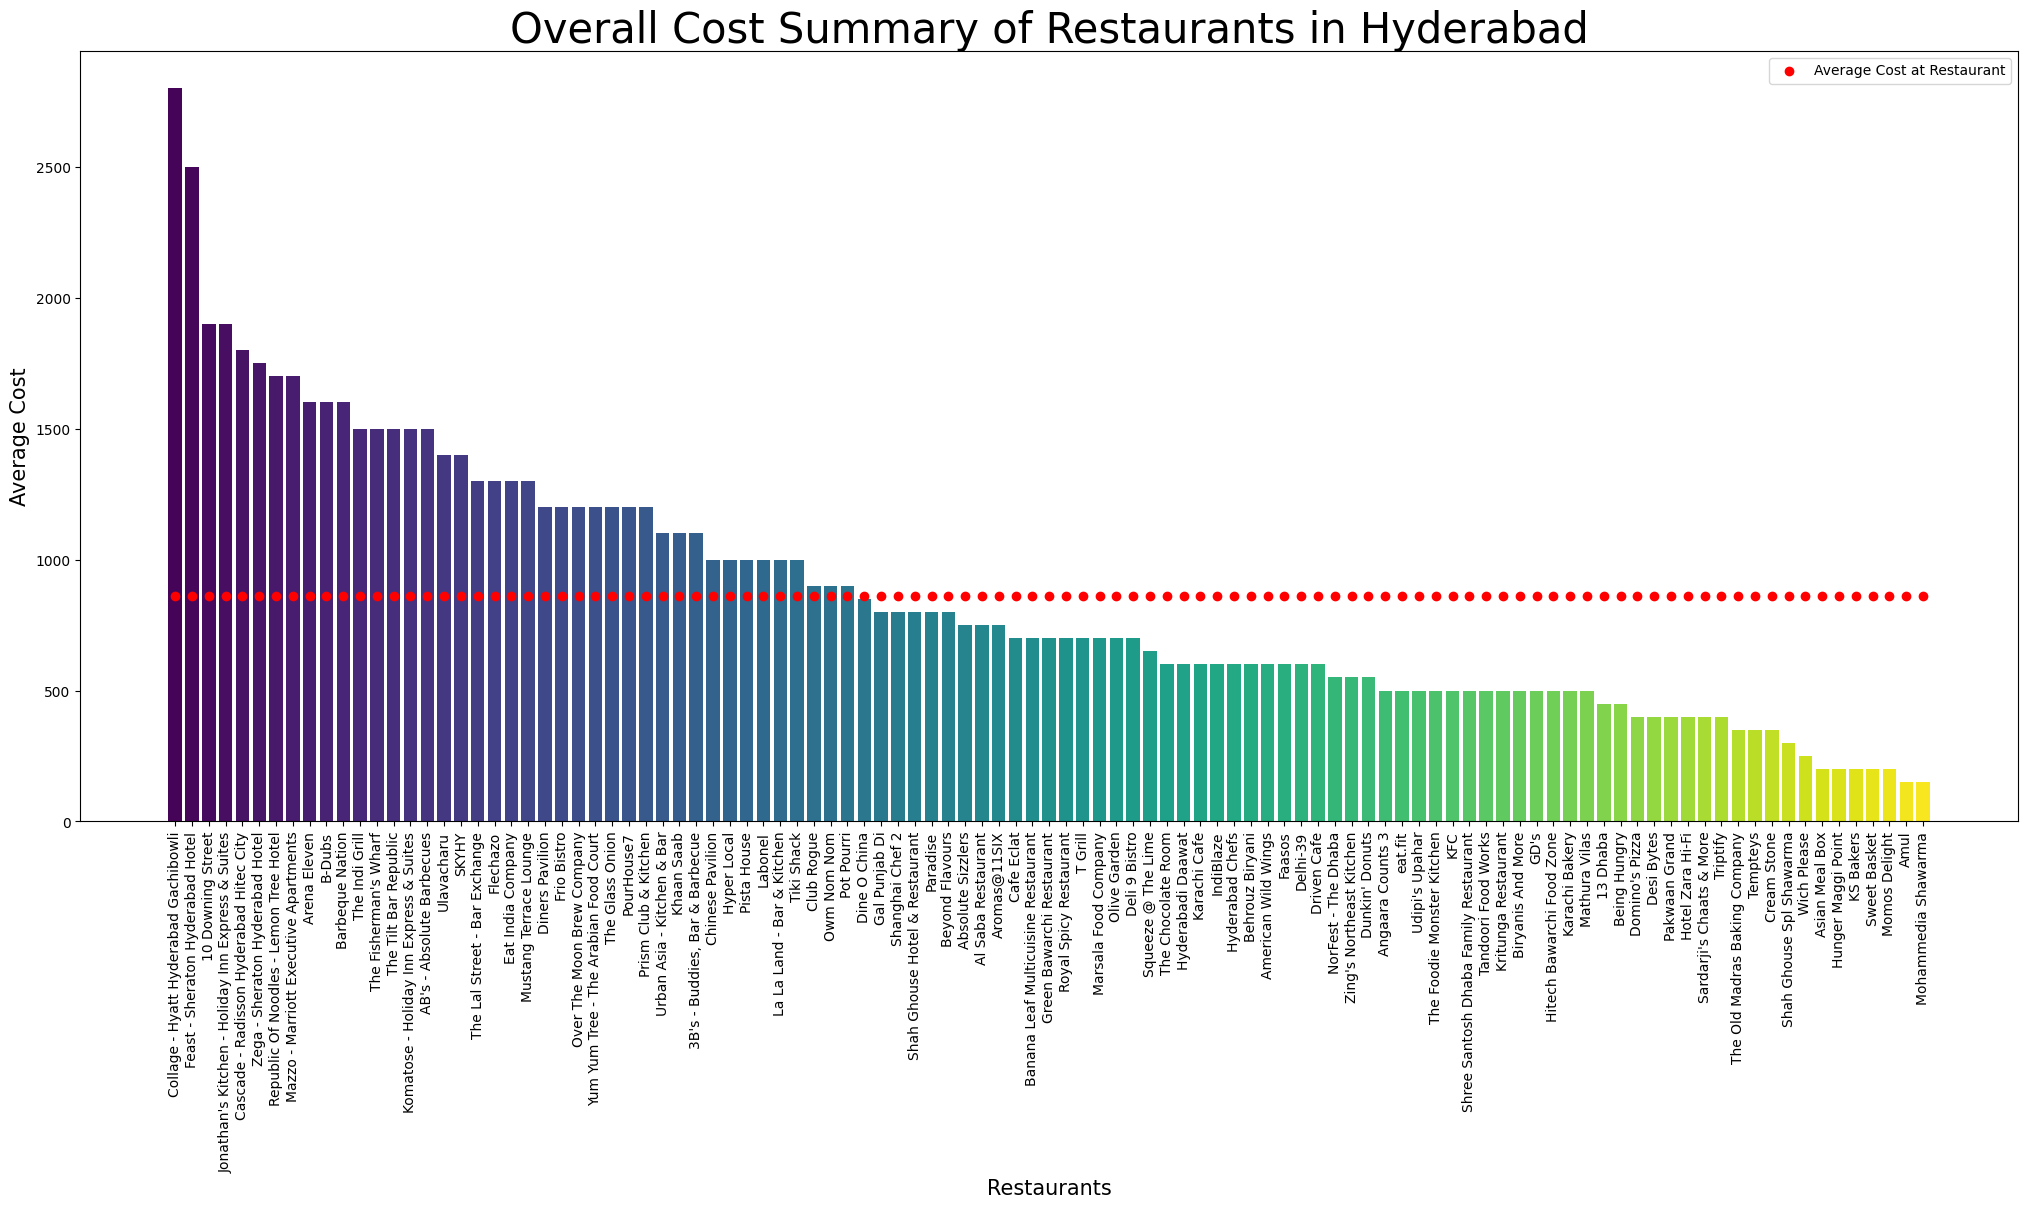

In [22]:
restaurants_cost=restaurants.groupby('Name').apply(lambda x:np.average(x['Cost'])).reset_index(name='Cost')
restaurants_cost.sort_values(by='Cost',ascending=False,inplace=True)
avg=np.average(restaurants_cost['Cost'])
plt.figure(figsize=(25,10))
plt.bar(restaurants_cost['Name'],restaurants_cost['Cost'], color = sns.color_palette("viridis", len(restaurants_cost['Name'])))
for i in restaurants_cost['Name']:
    plt.scatter(i,avg,color='red')
plt.xlabel('Restaurants',size=15)
plt.xticks(rotation=90)
plt.ylabel('Average Cost',size=15)
plt.title('Overall Cost Summary of Restaurants in Hyderabad',size=30)
plt.legend(['Average Cost at Restaurant'])

##### But which are the most expensive restaurants?

C:\Users\skmas\AppData\Local\Temp\ipykernel_19420\2469079922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_5_rest.sort_values(by='Cost',ascending=True,inplace=True)


Text(0, 0.5, 'Average Cost')

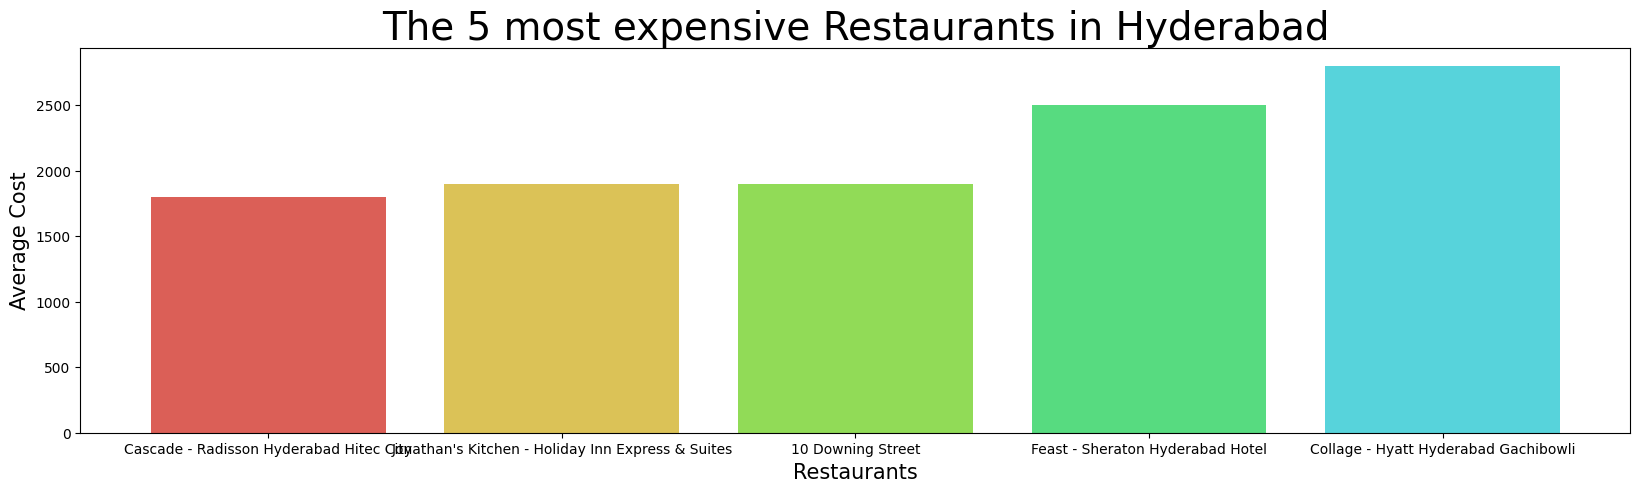

In [23]:
best_5_rest = restaurants_cost[:5]
best_5_rest.sort_values(by='Cost',ascending=True,inplace=True)
plt.figure(figsize=(20,5))
plt.bar(best_5_rest['Name'],best_5_rest['Cost'], color = sns.color_palette("hls", 8))
plt.title('The 5 most expensive Restaurants in Hyderabad',size=28)
plt.xlabel('Restaurants',size=15)
plt.ylabel('Average Cost',size=15)

##### And which are the cheapest restaurants?

Text(0, 0.5, 'Average Cost')

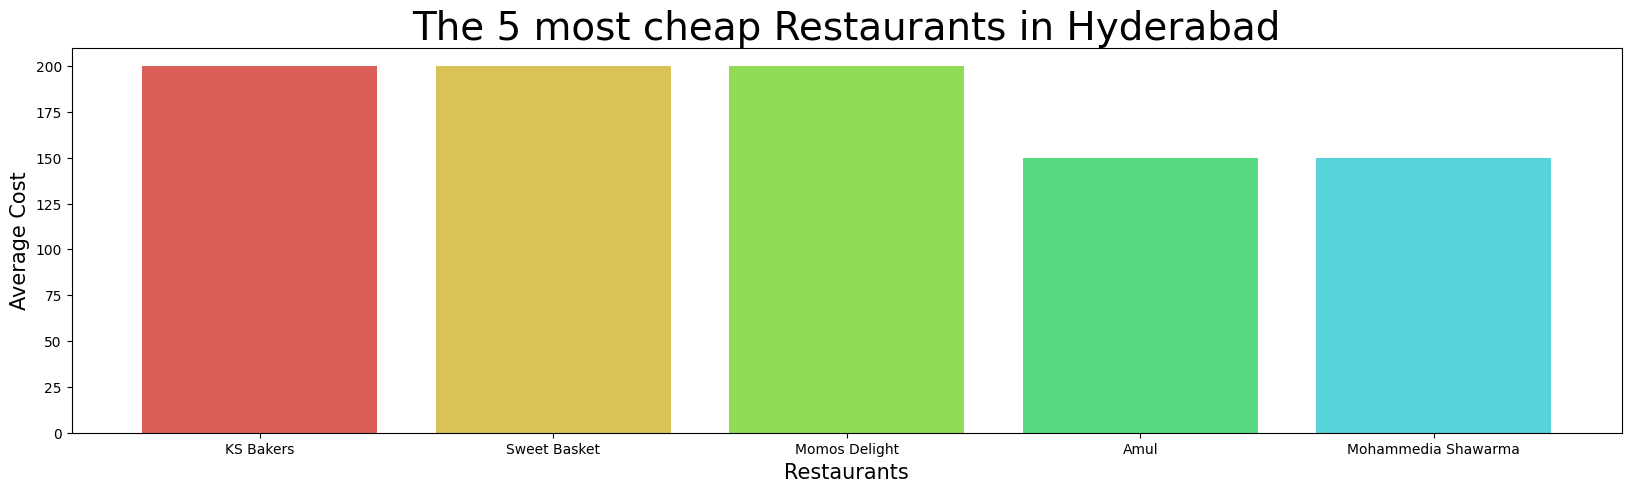

In [24]:
worst_5_rest = restaurants_cost[-5:]
plt.figure(figsize=(20,5))
plt.bar(worst_5_rest['Name'],worst_5_rest['Cost'], color = sns.color_palette("hls", 8))
plt.title('The 5 most cheap Restaurants in Hyderabad',size=28)
plt.xlabel('Restaurants',size=15)
plt.ylabel('Average Cost',size=15)

### Top 15 reviews

#### First of all, we extrapolate the 15 profiles that have made more reviews

In [25]:
reviewer_list = reviews.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review Count')
reviewer_list = reviewer_list.sort_values(by = 'Review Count',ascending=False)
top_reviewers = reviewer_list[:15]

C:\Users\skmas\AppData\Local\Temp\ipykernel_19420\2710948371.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  reviewer_list = reviews.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review Count')


##### Secondly, we plot a graph to represent them

Text(0, 0.5, 'N° of reviews')

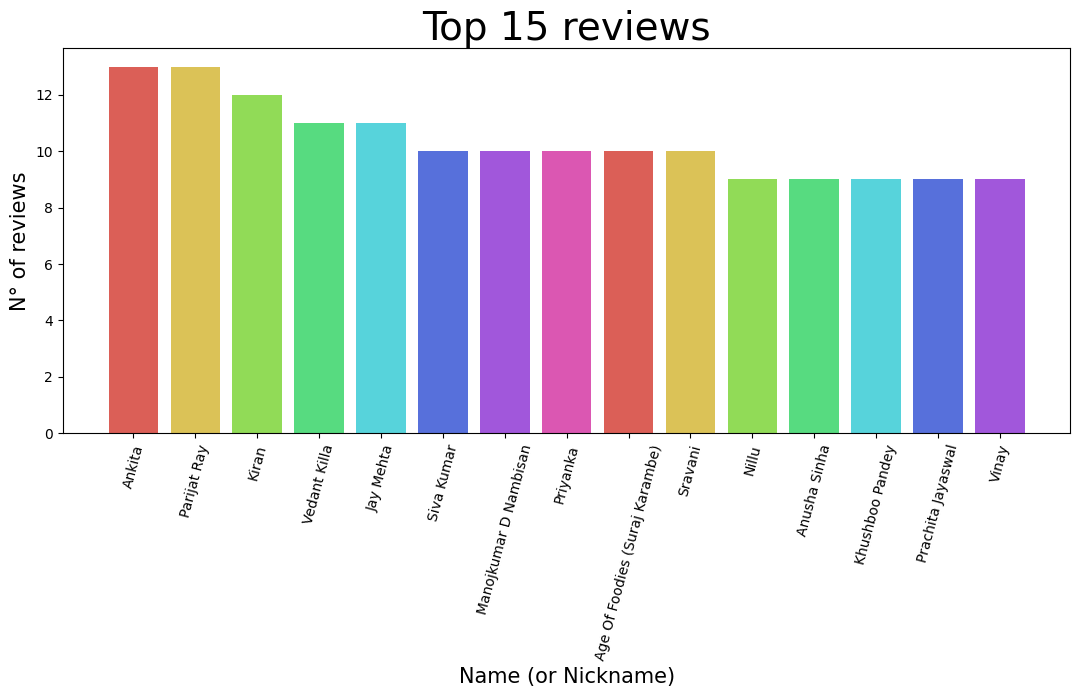

In [26]:
plt.figure(figsize=(13,5))
plt.bar(top_reviewers['Reviewer'], top_reviewers['Review Count'], color = sns.color_palette("hls", 8))
plt.xticks(rotation=75)
plt.title('Top 15 reviews',size=28)
plt.xlabel('Name (or Nickname)',size=15)
plt.ylabel('N° of reviews',size=15)

#### Bar graph of count of various rating's in reviews table

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline

sns.set_style("whitegrid")

<Axes: xlabel='Rating', ylabel='Count'>

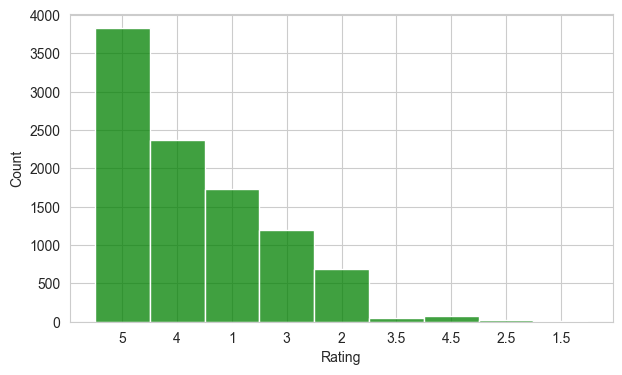

In [46]:
plt.figure(figsize=(7,4))

sns.histplot(x="Rating", data=reviews, color="green", binwidth=1)

In [42]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


#### Bar chart of Density of various cost's in Restaurants table

C:\Users\skmas\AppData\Local\Temp\ipykernel_19420\793397810.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(restaurants['Cost'])


<Axes: xlabel='Cost', ylabel='Density'>

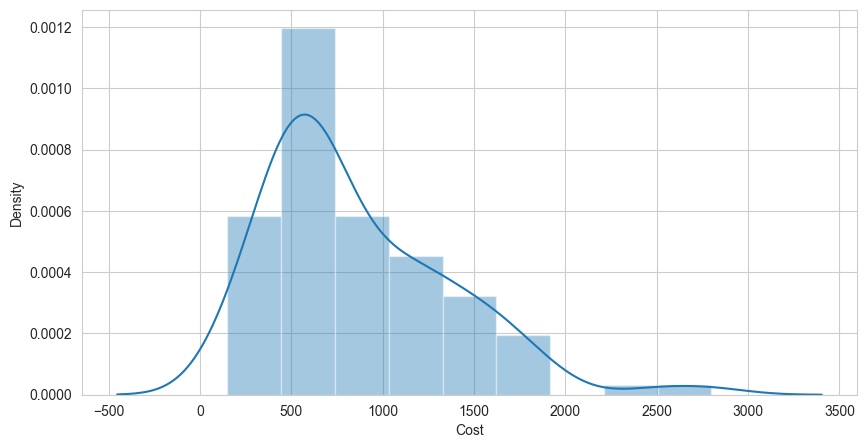

In [50]:
plt.figure(figsize=(10,5))

sns.distplot(restaurants['Cost'])